<a href="https://colab.research.google.com/github/IgnacioJuan/ColabFiles/blob/main/GuiaPracticaU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones y Lectura del conjunto de Datos



In [ ]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

import pydot
from prettytable import PrettyTable
import graphviz
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Lectura del CSV
datos = pd.read_csv('winequality-white.csv', sep=';')

# Numero de datos y Cabeceras/columnas
datos.shape

(4898, 12)

# Analisis de los datos

In [ ]:
# Primeras filas
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Datos estadisticos del dataset
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


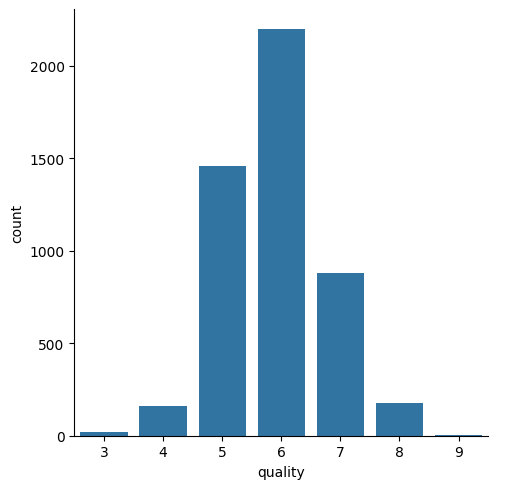

In [ ]:
# Estadisticas de calidad
sns.catplot(x='quality', data = datos, kind = 'count')

In [ ]:
# Datos nulos
datos.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Preparacion y Preprocesamiento de los Datos



In [ ]:
# Variables regressor
variables_numericas = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Variable Target
clase = ['quality']

variables_procesar = variables_numericas
variables_clases = variables_procesar + clase


# Filtrar el DataFrame
datos = datos[variables_clases]

In [ ]:
# Analisis variables numericas
print(datos[variables_numericas].describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [ ]:
# Analisis de clases
print(datos[clase].describe())

           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000


Ejemplos del grupo de datos originales: 4898
Ejemplos del grupo de datos sin outliers: 4698


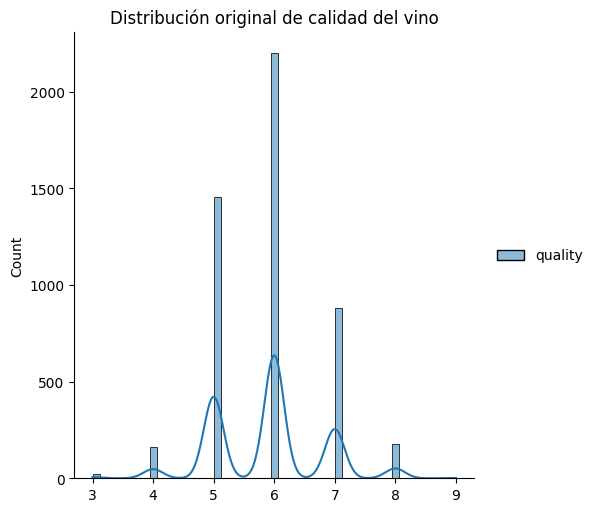

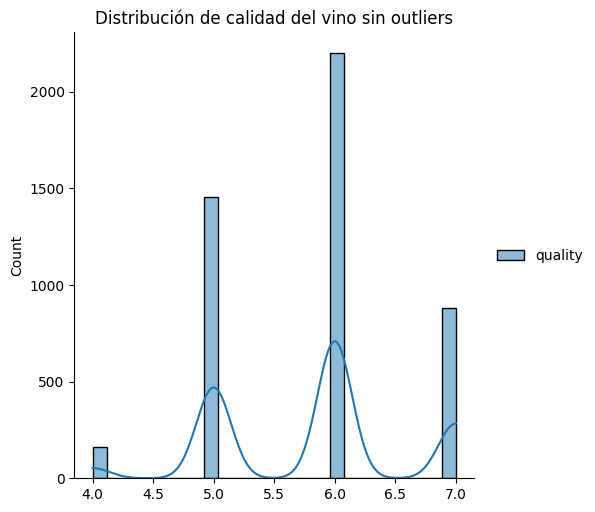

In [ ]:
# Calcular el rango intercuartílico para la variable 'quality'
q1 = datos.quality.quantile(0.25)
q3 = datos.quality.quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)

# Filtrar los datos según los límites
datos_preprocesados = pd.DataFrame(datos[variables_clases].loc[(datos.quality >= limite_inferior) & (datos.quality <= limite_superior)])

print("Ejemplos del grupo de datos originales: {}".format(len(datos)))
print("Ejemplos del grupo de datos sin outliers: {}".format(len(datos_preprocesados)))

# Desplegar las gráficas
sns.displot(datos[clase], kde=True)
plt.title('Distribución original de calidad del vino')
plt.show()

sns.displot(datos_preprocesados[clase], kde=True)
plt.title('Distribución de calidad del vino sin outliers')
plt.show()

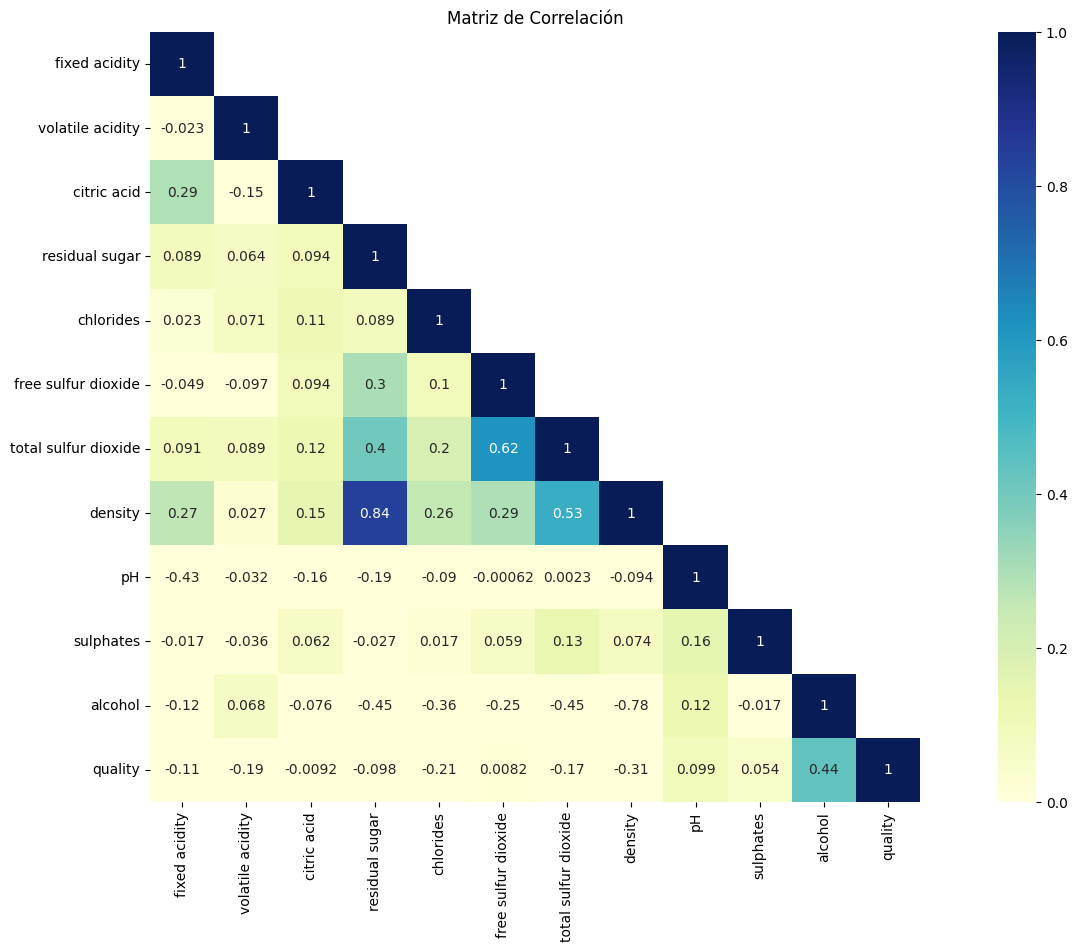

In [ ]:
# Calcular la matriz de correlación
matrix = datos[variables_numericas + clase].corr()

# Preparar la máscara para el mapa de calor
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False

# Construir el mapa de calor
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(matrix, mask=heat, vmax=1.0, vmin=0.0, square=True, annot=True, cmap='YlGnBu')
plt.title('Matriz de Correlación')
plt.show()

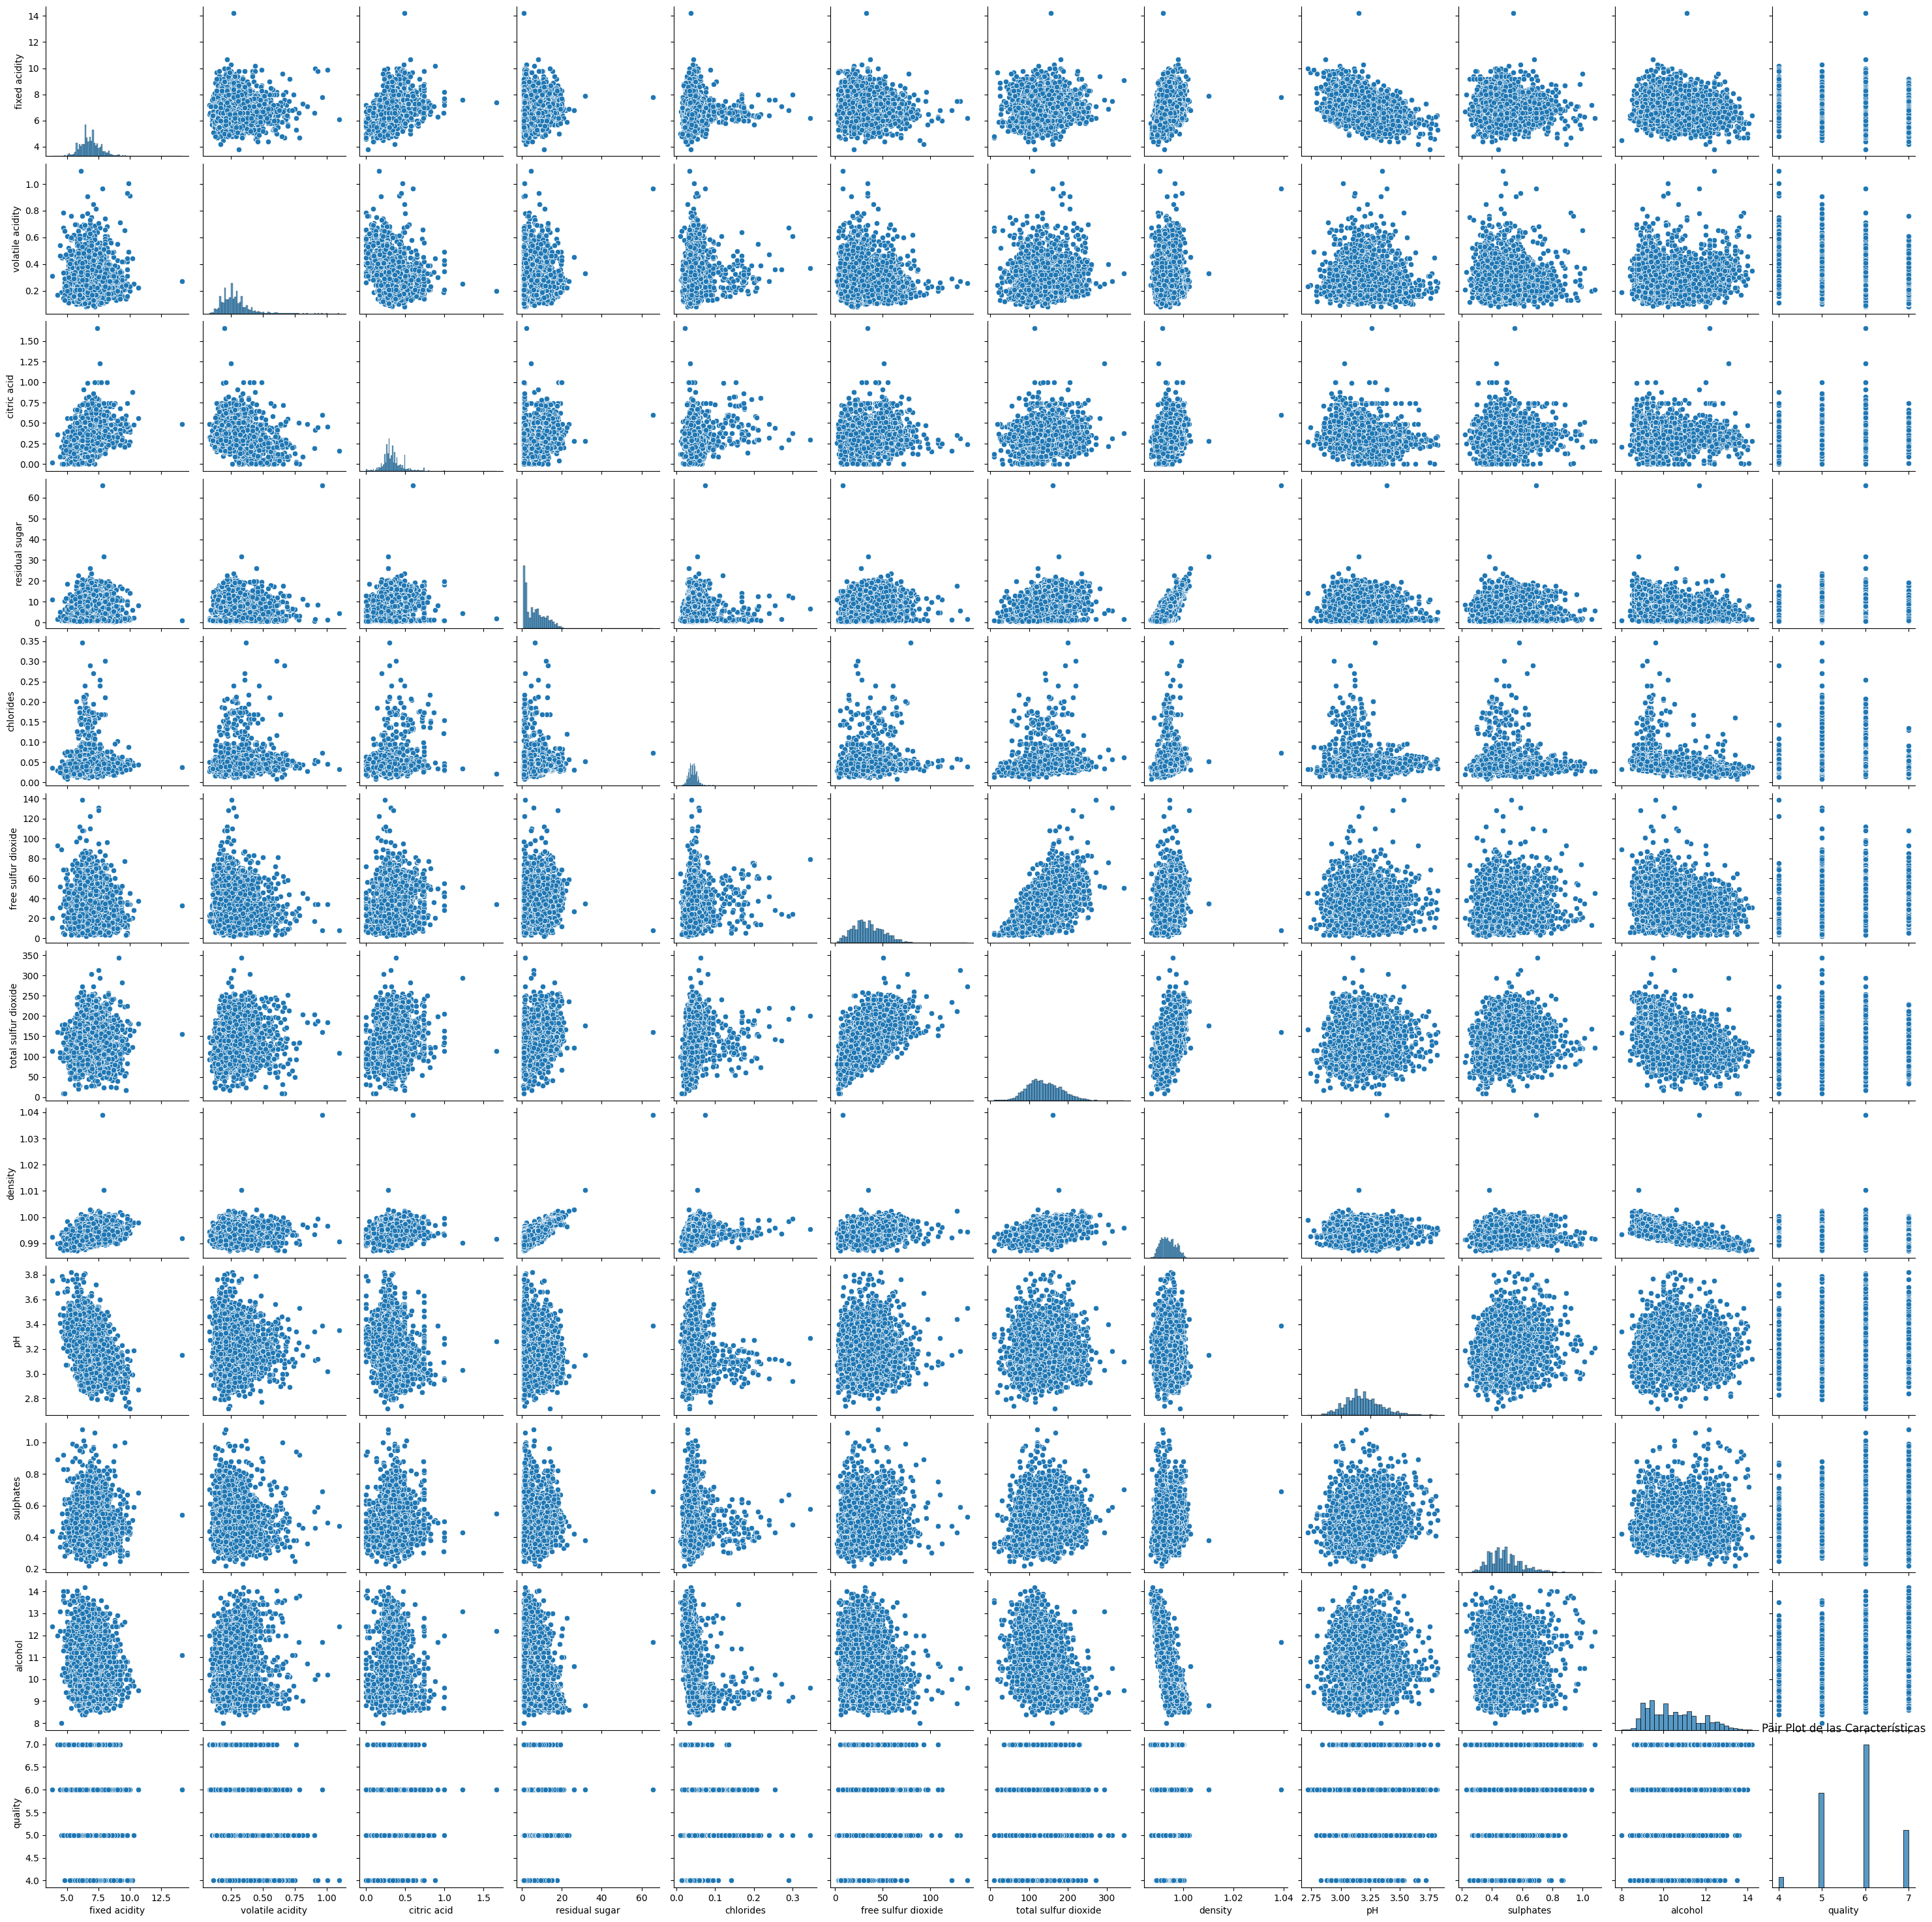

In [ ]:
# PairPlot: relación entre todas las característicasy distribucion de caracteristicas
sns.pairplot(datos_preprocesados)
plt.title('Pair Plot de las Características')
plt.show()

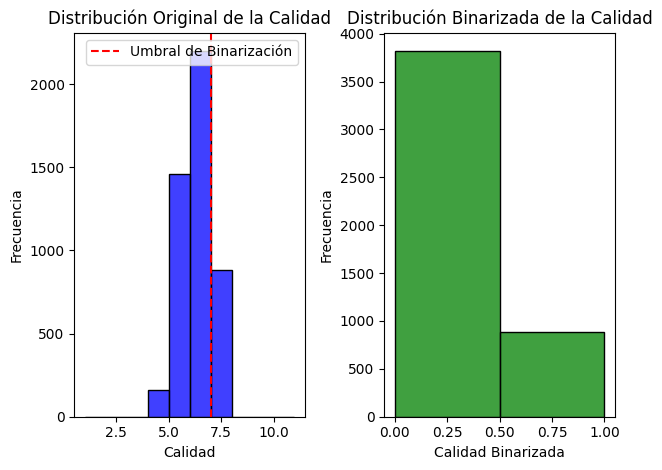

In [ ]:
# Crear una columna binarizada
calidad_binarizada = datos_preprocesados['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

# Gráfico de la distribución original
plt.subplot(1, 2, 1)
sns.histplot(datos_preprocesados['quality'], bins=range(1, 12), kde=False, color='blue')
plt.axvline(x=7, color='red', linestyle='--', label='Umbral de Binarización')
plt.title('Distribución Original de la Calidad')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.legend()

# Gráfico de la distribución binarizada
plt.subplot(1, 2, 2)
sns.histplot(calidad_binarizada, bins=2, kde=False, color='green')
plt.title('Distribución Binarizada de la Calidad')
plt.xlabel('Calidad Binarizada')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

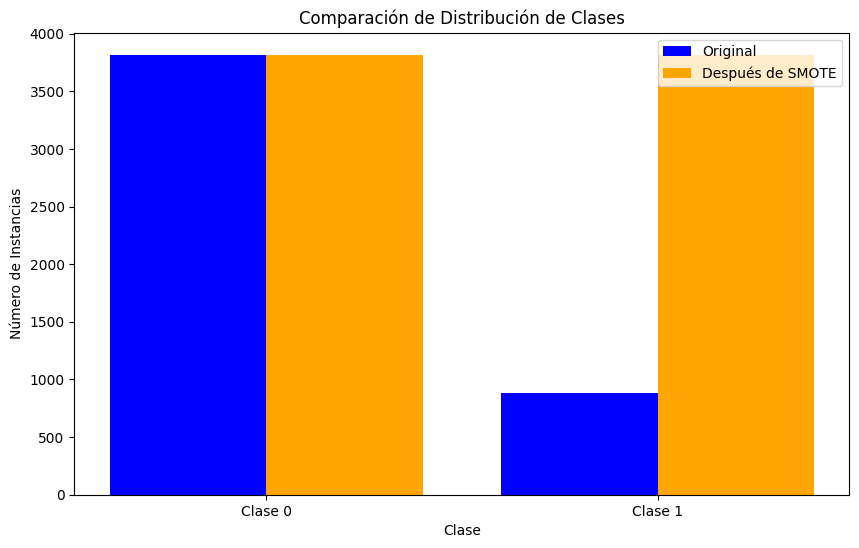

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Separar características y la variable objetivo binarizada
X = datos_preprocesados[variables_procesar]
y = calidad_binarizada

# Aplicar SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df_original = pd.DataFrame({'quality_binary': y})
df_resampled = pd.DataFrame({'quality_binary': y_resampled})

# Contar instancias por clase antes y después de SMOTE
counts_original = df_original['quality_binary'].value_counts().sort_index()
counts_resampled = df_resampled['quality_binary'].value_counts().sort_index()

# Graficar barras apiladas
plt.figure(figsize=(10, 6))

# Graficar la distribución original
plt.bar(counts_original.index - 0.2, counts_original.values, width=0.4, label='Original', color='blue')

# Graficar la distribución después de SMOTE
plt.bar(counts_resampled.index + 0.2, counts_resampled.values, width=0.4, label='Después de SMOTE', color='orange')

plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.title('Comparación de Distribución de Clases')
plt.legend()
plt.xticks([0, 1], ['Clase 0', 'Clase 1'])
plt.show()

In [ ]:
# Conjunto de valores
valores = datos_preprocesados[variables_procesar]
nombre_columnas_valores = datos_preprocesados[variables_procesar].columns.values

# Aplicando Binarización
valores_clases = calidad_binarizada

# valores_clases = datos_preprocesados[clases]

# Aplicando Oversampling
# - Genera nuevas muestras sintéticas para la clase minoritaria en función de las instancias existentes.
from imblearn.over_sampling import SMOTE
os=SMOTE()
valores,valores_clases=os.fit_resample(valores, valores_clases)

# Segmentar datos para el modelo
X_train, X_test, y_train, y_test = train_test_split(valores, valores_clases, test_size=0.2, random_state=3)

# Dimensiones, total, entrenamiento y prueba
print(valores.shape, y_train.shape, y_test.shape)


(7636, 11) (6108,) (1528,)


# Comparacion con el algoritmo: Clasificación con Näive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test)

predictions = naive_bayes.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.6649214659685864


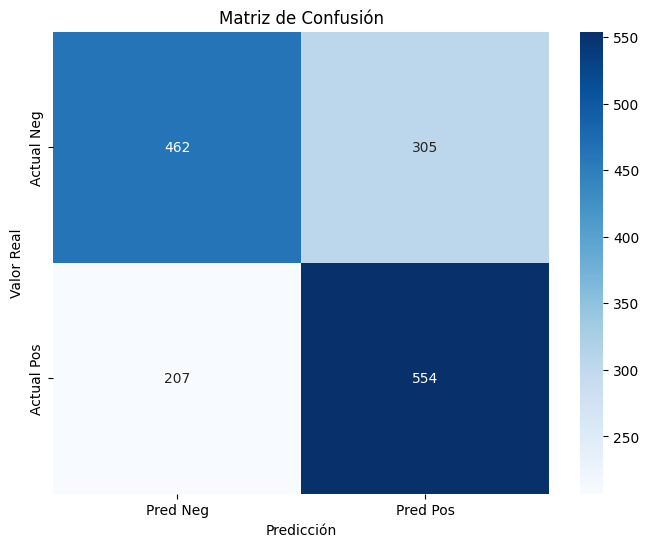

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Neg', 'Actual Pos'], columns=['Pred Neg', 'Pred Pos'])

# Graficar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Selección del Algoritmo: **RandomForest**

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

# Entrenamiento del Modelo

In [ ]:
# Puntajes
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9267015706806283


# Evaluación del Modelo

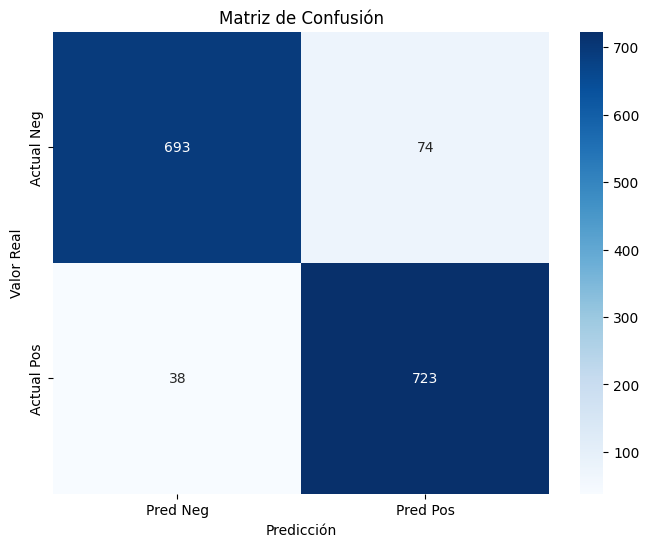

Accuracy: 0.93
Precision: 0.91
Recall: 0.95
F1 Score: 0.93


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import pandas as pd

# Suponiendo que ya tienes tu modelo entrenado y `X_test` y `y_test` disponibles

# Predicciones del modelo
X_test_prediction = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Métricas de clasificación
# weighted en multiclase binary en bianrio
accuracy = accuracy_score(y_test, X_test_prediction)
precision = precision_score(y_test, X_test_prediction, average='binary')
recall = recall_score(y_test, X_test_prediction, average='binary')
f1 = f1_score(y_test, X_test_prediction, average='binary')

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, X_test_prediction)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Neg', 'Actual Pos'], columns=['Pred Neg', 'Pred Pos'])

# Graficar la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Interpretación de Resultados
Accuracy (Precisión General):

El 94% con red (92% con white) las predicciones son correctas, indicando un alto rendimiento general del modelo.

Precision (Precisión):

El 91% con red (91% con white); de las veces que el modelo clasifica un vino en una categoría específica, lo hace correctamente.

Recall (Recuperación):

El modelo identifica correctamente el 97% con red (94% con white) de los vinos que realmente pertenecen a la categoría positiva.

F1 Score:

El F1 Score de 0.94 con red(0.92 con white) refleja un buen equilibrio entre precisión y recuperación, indicando una clasificación efectiva.

# Error out of Bag

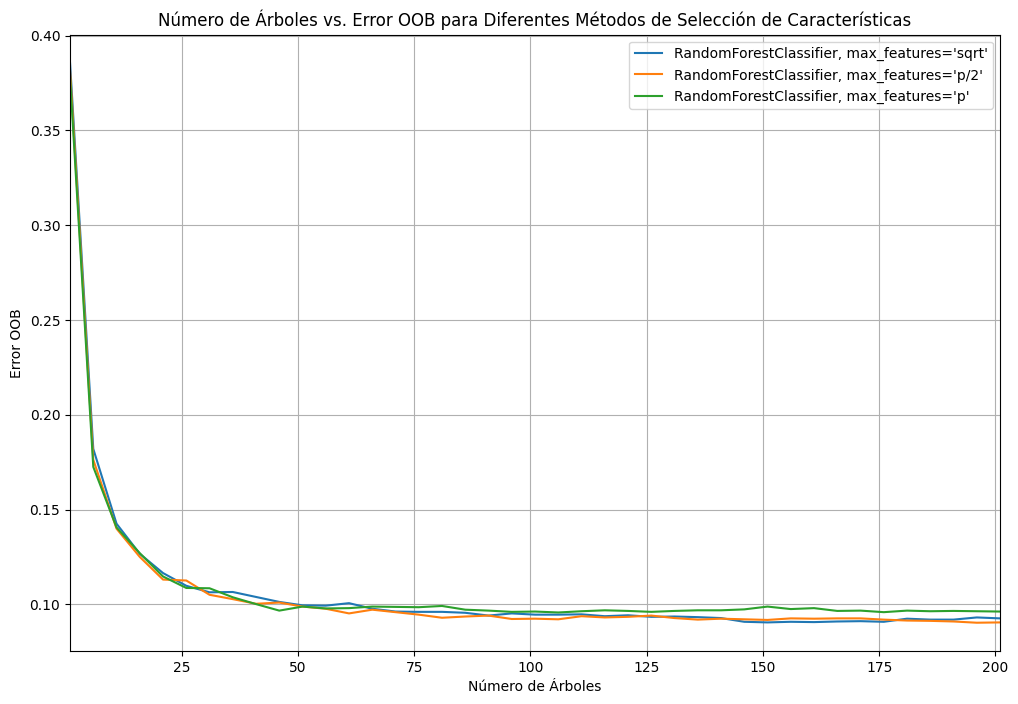

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

p = valores.shape[1]
sqrt_p = int(np.sqrt(p))

# Configuración de clasificadores con diferentes métodos de selección de características
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=sqrt_p,  # Usar sqrt(p) como valor
            random_state=42,
        ),
    ),
    (
        "RandomForestClassifier, max_features='p/2'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=p // 2,  # Usar p/2 como valor
            random_state=42,
        ),
    ),
    (
        "RandomForestClassifier, max_features='p'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=p,  # Usar p (número total de características) como valor
            random_state=42,
        ),
    ),
]

# Mapear un nombre de clasificador a una lista de pares (<n_estimators>, <error rate>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Rango de valores de `n_estimators` a explorar.
min_estimators = 1
max_estimators = 201

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Registrar el error OOB para cada configuración de `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generar la gráfica de "Error OOB" vs. "n_estimators".
plt.figure(figsize=(12, 8))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Número de Árboles")
plt.ylabel("Error OOB")
plt.title("Número de Árboles vs. Error OOB para Diferentes Métodos de Selección de Características")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Importancia de las caracteristicas
Usando mean decrease in impurity

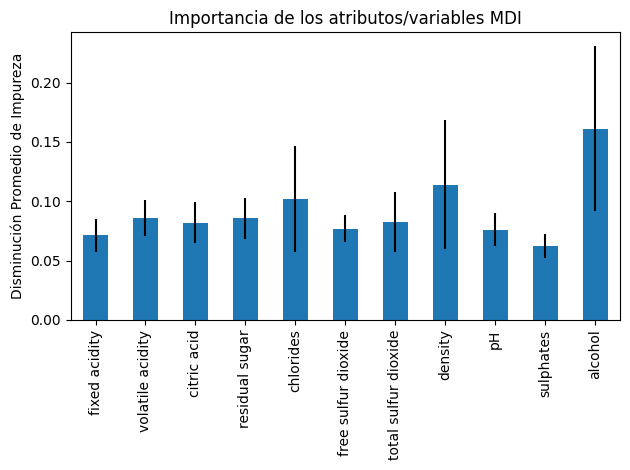

In [ ]:
# Obtiene la importancia de cada característica
importancia = model.feature_importances_

# Calcula la desviación estándar
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importancia, index=variables_numericas)
# Plotea un gráfico de barras de las importancias de las características con barras de error que representan la desviación estándar.

# Genera el Grafico de importancia con barras de error(Desviacion estandar)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de los atributos/variables MDI")
ax.set_ylabel("Disminución Promedio de Impureza")
fig.tight_layout()